In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
voltaje = [2.2,2.7,3.2,3.7,4.2,4.7]
voltaje = np.array(voltaje)*1000
D1 = [3.58,3.12,2.84,2.6,2.21,2.11]
D1 = np.array(D1)/100
D2 = [6.06,5.52,4.73,4.51,4.27,3.86]
D2 = np.array(D2)/100

Text(0.5, 0.98, 'Voltaje vs diámetros observados del patron de difracción')

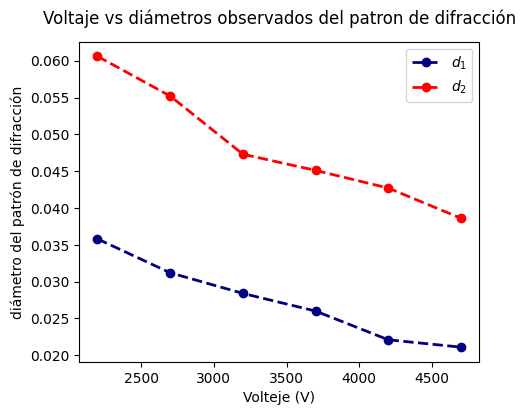

In [14]:
fig = plt.figure(figsize=(5,4),dpi=100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(voltaje,D1, color = "navy",label=r'$d_1$',lw=2,ls='--',marker='o')
axes.plot(voltaje,D2, color = "red", label=r'$d_2$',lw=2,ls='--',marker='o')
axes.set_xlabel('Volteje (V)')
axes.set_ylabel('diámetro del patrón de difracción')
axes.legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')


In [81]:
h = 6.62*10**(-34)
e=1.6*10**(-19)
m_e = 9.1*10**(-31)
lambdaBroglie = h/(2*e*voltaje*m_e)**(1/2)


d1 = 213*10**(-12)
d2 = 123*10**(-12)
L = 0.135
lambdaBragg1 = 2*d1/1 *np.sin(1/2*np.arctan(D1/(2*L)))
dlambdaBragg1 = 2*d1*np.sin(1/2*np.arctan(D1/(2*L)))*0.5
lambdaBragg2 = 2*d2*np.sin(1/2*np.arctan(D2/(2*L)))
dlambdaBragg2 = 2*d1*np.sin(1/2*np.arctan(D2/(2*L)))*0.5
print(lambdaBragg1)
print(lambdaBroglie)


[2.80581134e-11 2.44911366e-11 2.23121478e-11 2.04402106e-11
 1.73908308e-11 1.66075840e-11]
[2.61547735e-11 2.36091538e-11 2.16863926e-11 2.01679354e-11
 1.89294353e-11 1.78942448e-11]


2.1550003874246864e-11 2.1704567494758628e-11 2.140698924938204e-11 6.465001162274059e-11 1.1275787503374606e-10


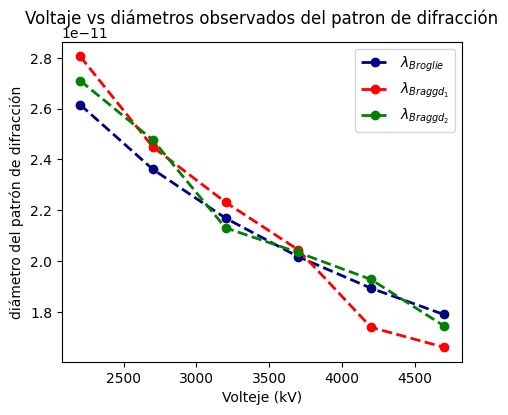

In [83]:
fig = plt.figure(figsize=(5,4),dpi=100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(voltaje,lambdaBroglie, color = "navy",label=r'$\lambda_{Broglie}$',lw=2,ls='--',marker='o')
axes.plot(voltaje,lambdaBragg1, color = "red", label=r'$\lambda_{Bragg d_1}$',lw=2,ls='--',marker='o')
axes.plot(voltaje,lambdaBragg2, color = "green", label=r'$\lambda_{Bragg d_2}$',lw=2,ls='--',marker='o')
axes.set_xlabel('Volteje (kV)')
axes.set_ylabel('diámetro del patrón de difracción')
axes.legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')

print(lambdaBragg1.mean(), lambdaBragg2.mean(), lambdaBroglie.mean(),dlambdaBragg1.sum(),dlambdaBragg2.sum())


In [17]:
d1_estimado=np.tan((np.arcsin((lambdaBroglie/(2*d1)))*2))*(2*L)
d2_estimado=np.tan((np.arcsin((lambdaBroglie/(2*d2)))*2))*(2*L)


Text(0.5, 0.98, 'Voltaje vs diámetros observados del patron de difracción')

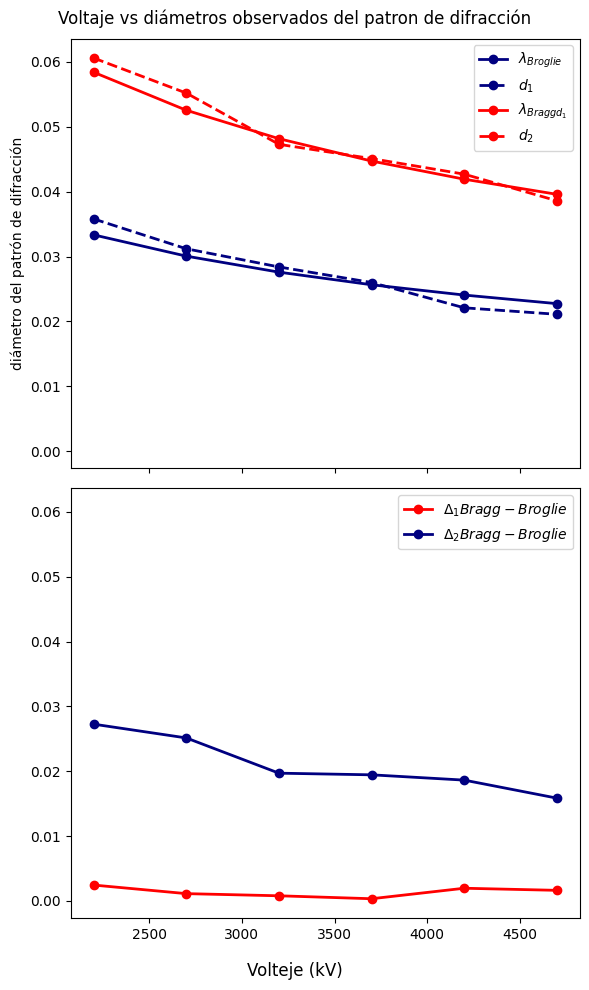

In [70]:
fig, axis  = plt.subplots(figsize=(6,10), nrows =2, ncols = 1,layout='tight',
                        sharex=True, sharey=True)
#axes = fig.add_axes([0.1,0.1,0.8,0.8])
axis[0].plot(voltaje,d1_estimado, color = "navy",label=r'$\lambda_{Broglie}$',lw=2,marker='o')
axis[0].plot(voltaje,D1, color = "navy",label=r'$d_1$',lw=2,ls='--',marker='o')


axis[0].plot(voltaje,d2_estimado, color = "red", label=r'$\lambda_{Bragg d_1}$',lw=2,marker='o')
axis[1].plot(voltaje,abs(d1_estimado-D1), color = "red",label=r'$\Delta_1 Bragg-Broglie$',lw=2,marker='o')
axis[1].plot(voltaje,abs(d1_estimado-D2), color = "navy",label=r'$\Delta_2 Bragg-Broglie$',lw=2,marker='o')


axis[0].plot(voltaje,D2, color = "red", label=r'$d_2$',lw=2,ls='--',marker='o')
fig.supxlabel('Volteje (kV)')
axis[0].set_ylabel('diámetro del patrón de difracción')
axis[0].legend(loc=0)
axis[1].legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')



In [19]:
voltaje_1_2 = voltaje**(-1/2)


Text(0.5, 0.98, 'Voltaje vs diámetros observados del patron de difracción')

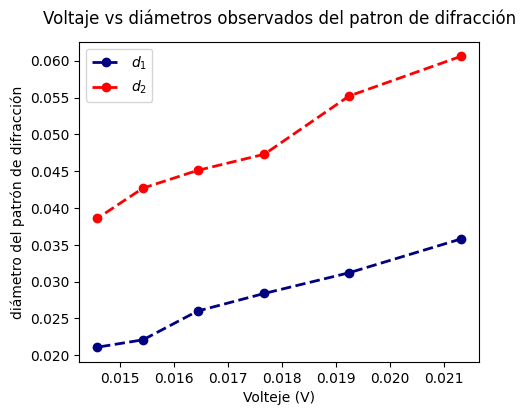

In [20]:
fig = plt.figure(figsize=(5,4),dpi=100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(voltaje_1_2,D1, color = "navy",label=r'$d_1$',lw=2,ls='--',marker='o')
axes.plot(voltaje_1_2,D2, color = "red", label=r'$d_2$',lw=2,ls='--',marker='o')
axes.set_xlabel('Volteje (V)')
axes.set_ylabel('diámetro del patrón de difracción')
axes.legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')

0.03921598827820066
0.03619177023031092


Text(0.5, 0.98, 'Voltaje vs diámetros observados del patron de difracción')

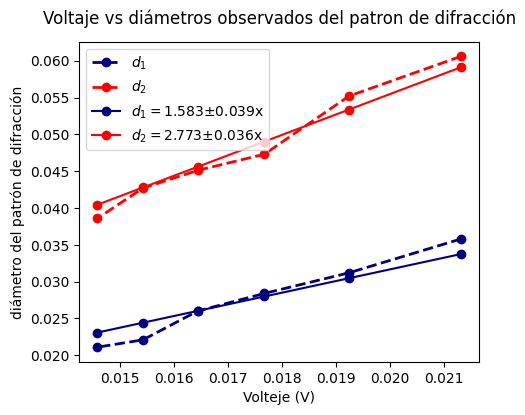

In [67]:
import scipy.optimize as opt

def linear(m,x):
    return m*x
p0 = [20]
popt1, pcov1 = opt.curve_fit(linear,voltaje_1_2,D1,p0)  
m1 = popt1[0]
m_error1 = np.sqrt(pcov1[0,0])



y1 = linear(m1,voltaje_1_2)


print(m_error1)
p0 = [20]
popt2, pcov2 = opt.curve_fit(linear,voltaje_1_2,D2,p0)  
m2 = popt2[0]
m_error2 = np.sqrt(pcov2[0,0])


y2 = linear(m2,voltaje_1_2)


print(m_error2)


fig = plt.figure(figsize=(5,4),dpi=100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(voltaje_1_2,D1, color = "navy",label=r'$d_1 $',lw=2,ls='--',marker='o')
axes.plot(voltaje_1_2,D2, color = "red", label=r'$d_2$',lw=2,ls='--',marker='o')
axes.plot(voltaje_1_2,y1, color = "navy",label=r'$d_1 =$'+str(round(m1,3))+r'$\pm$'+str(round(m_error1,3))+'x',marker='o')
axes.plot(voltaje_1_2,y2, color = "red", label=r'$d_2 =$'+str(round(m2,3))+r'$\pm$'+str(round(m_error2,3))+'x',marker='o')
axes.set_xlabel('Volteje (V)')
axes.set_ylabel('diámetro del patrón de difracción')
axes.legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')





Text(0.5, 0.98, 'Voltaje vs diámetros observados del patron de difracción')

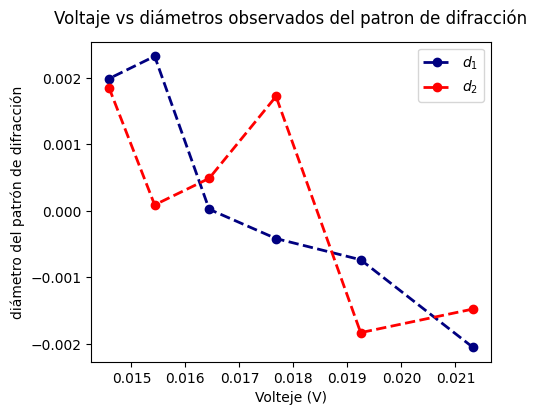

In [62]:
fig = plt.figure(figsize=(5,4),dpi=100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(voltaje_1_2,y1-D1, color = "navy",label=r'$d_1$',lw=2,ls='--',marker='o')
axes.plot(voltaje_1_2,y2-D2, color = "red", label=r'$d_2$',lw=2,ls='--',marker='o')
axes.set_xlabel('Volteje (V)')
axes.set_ylabel('diámetro del patrón de difracción')
axes.legend(loc=0)
fig.suptitle('Voltaje vs diámetros observados del patron de difracción')



In [54]:
d1_aprox= (2*1*L*h)/(m1*(2*m_e*e)**(1/2))
d2_aprox = ((2*2*L*h))/(m2*(2*m_e*e)**(1/2))


d1_error = (2*1*L*h)/(m1**2*(2*m_e*e)**(1/2))*m_error1
d2_error = (2*1*L*h)/(m2**2*(2*m_e*e)**(1/2))*m_error2


print(d1,d2,d1_error,d2_error)

2.13e-10 1.23e-10 5.183934720796293e-12 1.5589179231758987e-12


In [61]:

e=1.6*10**(-19)
m_e = 9.1*10**(-31)
h = 6.62*10**(-34)

h1 = 2*d1/1 *np.sin(1/2*np.arctan(D1/(2*L)))*(2*m_e*e*voltaje)**(1/2)
h2 = 2*d2*np.sin(1/2*np.arctan(D2/(2*L)))*(2*m_e*e*voltaje)**(1/2)

dh1 = 2*d1/1 *np.sin(1/2*np.arctan(D1/(2*L)))*(2*m_e*e)**(1/2)*(voltaje)**(-1/2)/2*1
dh2 = 2*d2/1 *np.sin(1/2*np.arctan(D2/(2*L)))*(2*m_e*e)**(1/2)*(voltaje)**(-1/2)/2*1

dh1 = dh1.sum()
dh2 = dh2.sum()




print(h1.mean(),h2.mean(),dh2,dh1)

6.619228011974654e-34 6.696236197931331e-34 6.25219221726958e-37 6.23430660353896e-37
